In [2]:
import pandas as pd
file_path = 'test2k.csv'

df = pd.read_csv(file_path)
df.head()

,name,cls,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,CC1=CC(=C(N1C)C)C2=CSC(=N2)N,1,NaN,NaN,0,0,17.701129,2.439857,4.640601,17.701129,...,9.512739,61.847126,207.083018,7.669741,288,19,74,88,5.666667,3.027778
1,CCCOC1=CC=C(C=C1)C(=O)N/N=C/C2=CC=C(O2)C3=CC=C...,1,NaN,NaN,0,0,46.736633,2.407624,4.793640,46.736633,...,10.344288,85.856674,505.141990,8.561729,5352,52,184,211,10.701389,8.013889
2,COC1=CC(=C(C=C1)C(C[N+](=O)[O-])C2=C(C=C3N2C=C...,1,NaN,NaN,0,0,39.586705,2.537049,4.973884,39.586705,...,10.368070,80.145118,402.157957,7.733807,2195,50,158,189,9.111111,6.777778
3,CC1=C(C(=O)N(N1)C2=CC=CC=C2)N=NC3=NC=CS3,1,NaN,NaN,0,0,26.395318,2.442924,4.716386,26.395318,...,9.777074,69.229338,285.068431,9.195756,853,27,104,122,5.666667,4.444444
4,CCCCN=C1N(C(=CS1)C2=CC3=C(C=C2)OCC(=O)N3)N=C4C...,1,NaN,NaN,0,0,35.597476,2.464844,4.867887,35.597476,...,10.147649,77.687460,384.161997,7.532588,1886,39,142,167,7.138889,6.027778


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df.shape

(2401, 1615)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Columns: 1615 entries, name to mZagreb2
dtypes: float64(1273), int64(341), object(1)
memory usage: 29.6+ MB


In [6]:

features = df.iloc[:, : -2]
predictions= df.iloc[:, -2]
features.head()

,name,cls,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,...,SRW08,SRW09,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2
0,CC1=CC(=C(N1C)C)C2=CSC(=N2)N,1,NaN,NaN,0,0,17.701129,2.439857,4.640601,17.701129,...,7.881182,7.486053,9.512739,61.847126,207.083018,7.669741,288,19,74,88
1,CCCOC1=CC=C(C=C1)C(=O)N/N=C/C2=CC=C(O2)C3=CC=C...,1,NaN,NaN,0,0,46.736633,2.407624,4.793640,46.736633,...,8.732788,6.580639,10.344288,85.856674,505.141990,8.561729,5352,52,184,211
2,COC1=CC(=C(C=C1)C(C[N+](=O)[O-])C2=C(C=C3N2C=C...,1,NaN,NaN,0,0,39.586705,2.537049,4.973884,39.586705,...,8.683893,7.065613,10.368070,80.145118,402.157957,7.733807,2195,50,158,189
3,CC1=C(C(=O)N(N1)C2=CC=CC=C2)N=NC3=NC=CS3,1,NaN,NaN,0,0,26.395318,2.442924,4.716386,26.395318,...,8.160804,7.390799,9.777074,69.229338,285.068431,9.195756,853,27,104,122
4,CCCCN=C1N(C(=CS1)C2=CC3=C(C=C2)OCC(=O)N3)N=C4C...,1,NaN,NaN,0,0,35.597476,2.464844,4.867887,35.597476,...,8.501267,7.273093,10.147649,77.687460,384.161997,7.532588,1886,39,142,167


In [7]:
print(predictions.head())


0     5.666667
1    10.701389
2     9.111111
3     5.666667
4     7.138889
Name: mZagreb1, dtype: float64


In [8]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
label_encoder = LabelEncoder()

for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])

scaler = StandardScaler()
features_scaled = scaler.fit_transform(df)

features_scaled = pd.DataFrame(features_scaled, columns=df.columns)

features_scaled.head()


C:\Users\MAYANK PUVVALA\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\extmath.py:1050: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\MAYANK PUVVALA\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\extmath.py:1055: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\MAYANK PUVVALA\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\extmath.py:1075: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


,name,cls,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,-0.260880,1.000417,NaN,NaN,-0.266852,-0.428501,-2.052503,-0.102792,-1.163514,-2.052503,...,-1.557890,-0.772131,-1.953020,-0.573303,-0.138580,-1.699277,-1.808588,-1.664314,-1.201977,-2.104432
1,0.597849,1.000417,NaN,NaN,-0.266852,-0.428501,2.107659,-0.464158,-0.218182,2.107659,...,0.792914,1.607226,1.984479,0.193708,-0.138577,1.189534,1.777010,1.516096,1.259681,2.170765
2,1.416031,1.000417,NaN,NaN,-0.266852,-0.428501,1.083228,0.986820,0.895201,1.083228,...,0.860148,1.041208,0.624012,-0.518214,-0.138579,1.014455,0.929505,0.947243,0.482137,1.110897
3,-0.498370,1.000417,NaN,NaN,-0.266852,-0.428501,-0.806813,-0.068414,-0.695385,-0.806813,...,-0.810610,-0.040550,-0.922796,0.738902,-0.138579,-0.998959,-0.830698,-0.785176,-1.201977,-0.889752
4,0.551509,1.000417,NaN,NaN,-0.266852,-0.428501,0.511657,0.177328,0.240448,0.511657,...,0.237012,0.797653,0.386277,-0.691240,-0.138579,0.051518,0.407963,0.378389,-0.482154,0.467831


In [9]:
unique_values_abc = df['ABC'].unique()
unique_values_abcgg = df['ABCGG'].unique()
unique_values_nAcid = df['nAcid'].unique()


print("Unique values in column 'ABC':")
print(unique_values_abc)

print("\nUnique values in column 'ABCGG':")
print(unique_values_abcgg)

print("\nUnique values in column 'nAcid':")
print(unique_values_nAcid)


Unique values in column 'ABC':
[nan]

Unique values in column 'ABCGG':
[nan]

Unique values in column 'nAcid':
[0 1 2 4]


In [10]:

features_scaled = features_scaled.drop(columns=['ABC', 'ABCGG'])

features_scaled.head()


,name,cls,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,-0.260880,1.000417,-0.266852,-0.428501,-2.052503,-0.102792,-1.163514,-2.052503,-0.585163,-2.484848,...,-1.557890,-0.772131,-1.953020,-0.573303,-0.138580,-1.699277,-1.808588,-1.664314,-1.201977,-2.104432
1,0.597849,1.000417,-0.266852,-0.428501,2.107659,-0.464158,-0.218182,2.107659,0.252818,1.758861,...,0.792914,1.607226,1.984479,0.193708,-0.138577,1.189534,1.777010,1.516096,1.259681,2.170765
2,1.416031,1.000417,-0.266852,-0.428501,1.083228,0.986820,0.895201,1.083228,0.780172,0.988695,...,0.860148,1.041208,0.624012,-0.518214,-0.138579,1.014455,0.929505,0.947243,0.482137,1.110897
3,-0.498370,1.000417,-0.266852,-0.428501,-0.806813,-0.068414,-0.695385,-0.806813,0.785344,-0.857198,...,-0.810610,-0.040550,-0.922796,0.738902,-0.138579,-0.998959,-0.830698,-0.785176,-1.201977,-0.889752
4,0.551509,1.000417,-0.266852,-0.428501,0.511657,0.177328,0.240448,0.511657,0.752172,0.529149,...,0.237012,0.797653,0.386277,-0.691240,-0.138579,0.051518,0.407963,0.378389,-0.482154,0.467831


In [11]:
predictions.head()

0     5.666667
1    10.701389
2     9.111111
3     5.666667
4     7.138889
Name: mZagreb1, dtype: float64

***Variance threshold based method***

In [12]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold

df = pd.read_csv('test2k.csv')
df = df.apply(pd.to_numeric, errors='coerce').fillna(0)
threshold = 0.01
selector = VarianceThreshold(threshold)
features_selected = selector.fit_transform(df)
selected_indices = selector.get_support(indices=True)
selected_df = df.iloc[:, selected_indices]
selected_df.head()

,cls,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,VE1_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,1,0,0,17.701129,2.439857,4.640601,17.701129,1.264366,3.582199,3.443387,...,9.512739,61.847126,207.083018,7.669741,288,19,74,88,5.666667,3.027778
1,1,0,0,46.736633,2.407624,4.793640,46.736633,1.298240,4.501393,4.490651,...,10.344288,85.856674,505.141990,8.561729,5352,52,184,211,10.701389,8.013889
2,1,0,0,39.586705,2.537049,4.973884,39.586705,1.319557,4.334574,4.469321,...,10.368070,80.145118,402.157957,7.733807,2195,50,158,189,9.111111,6.777778
3,1,0,0,26.395318,2.442924,4.716386,26.395318,1.319766,3.934751,3.715307,...,9.777074,69.229338,285.068431,9.195756,853,27,104,122,5.666667,4.444444
4,1,0,0,35.597476,2.464844,4.867887,35.597476,1.318425,4.235035,4.417538,...,10.147649,77.687460,384.161997,7.532588,1886,39,142,167,7.138889,6.027778


In [13]:
selected_df.shape

(2401, 1173)

In [14]:
selected_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Columns: 1173 entries, cls to mZagreb2
dtypes: float64(1006), int64(167)
memory usage: 21.5 MB


In [15]:
selected_df.describe()

,cls,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,VE1_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
count,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,...,2401.000000,2401.000000,2401.000000,2401.000000,2.401000e+03,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000
mean,0.499792,0.111620,0.302791,30.345719,2.320506,4.575546,30.345719,1.220427,3.904189,3.888108,...,10.063810,69.638520,354.921808,8.336458,2.273653e+08,38.411495,129.484382,152.366097,7.749393,5.482152
std,0.500104,0.418373,0.706774,9.858906,0.553081,1.088502,9.858906,0.289958,0.942887,0.982258,...,0.353803,10.092874,75.713298,1.163181,1.641023e+09,11.425765,30.684671,38.682313,2.627438,1.166531
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,8.448700,39.179718,147.054495,5.373257,1.120000e+02,7.000000,42.000000,40.000000,0.000000,2.208333
25%,0.000000,0.000000,0.000000,26.357355,2.378866,4.701235,26.357355,1.259340,3.947471,3.802040,...,9.845276,62.253768,304.108402,7.574640,1.049000e+03,30.000000,108.000000,125.000000,6.500000,4.722222
50%,0.000000,0.000000,0.000000,31.355701,2.443865,4.816265,31.355701,1.289165,4.117967,4.060620,...,10.097779,70.872742,352.078073,8.190260,1.601000e+03,38.000000,128.000000,151.000000,7.916667,5.472222
75%,1.000000,0.000000,0.000000,36.344374,2.501420,4.933070,36.344374,1.315166,4.271702,4.325792,...,10.300282,77.113054,404.080681,8.877421,2.362000e+03,45.000000,150.000000,177.000000,9.333333,6.250000
max,1.000000,4.000000,4.000000,119.145518,2.882367,5.450456,119.145518,1.395657,5.409243,5.492726,...,11.652000,148.727472,1300.958738,18.768044,3.600001e+10,150.000000,434.000000,491.000000,28.861111,21.972222


In [16]:
import pandas as pd

nan_counts = selected_df.isnull().sum()

features_with_nan = nan_counts[nan_counts > 0].index.tolist()

print("Features with NaN values:")
print(features_with_nan)


Features with NaN values:
[]


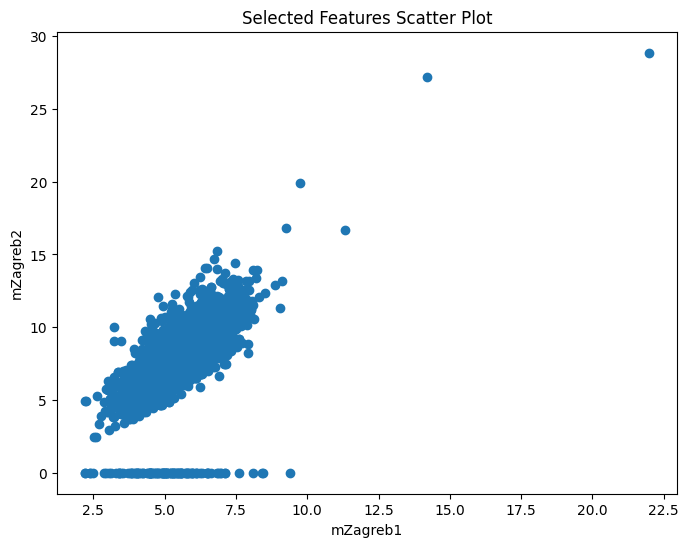

In [17]:
x = selected_df.iloc[:, -1]
y = selected_df.iloc[:, -2]

plt.figure(figsize=(8, 6))
plt.scatter(x, y)
plt.xlabel('mZagreb1')
plt.ylabel('mZagreb2')
plt.title('Selected Features Scatter Plot')
plt.show()

*used scatter plot to find the most useful features*

In [18]:
# correlation_matrix = df.corr()

# import seaborn as sns
# import matplotlib.pyplot as plt

# plt.figure(figsize=(12, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
# plt.title('Correlation Matrix')
# plt.show()
# # import pandas as pd

# df = pd.read_csv('test2k.csv')
# correlation_matrix = df.corr()  # Assuming df is your DataFrame
# threshold = 0.5
# highly_correlated = (correlation_matrix.abs() > threshold).sum() > 1
# selected_features = df.columns[highly_correlated].tolist()
# selected_df = df[selected_features]
# selected_df.head()


***Correlation based method***

In [19]:
# import pandas as pd

# df = pd.read_csv('test2k.csv')
# correlation_matrix = features_scaled.corr()
# threshold = 0.5
# highly_correlated = (correlation_matrix.abs() > threshold).sum() > 1
# selected_features = df.columns[highly_correlated]
# selected_df = df[selected_features]
# selected_df.head()

In [20]:
# selected_df.shape

In [21]:
# selected_df.info()

***SVC Method***

In [22]:
# from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test=train_test_split(features_scaled,predictions,test_size=0.2,random_state=0,shuffle=True)

In [23]:
# Train_data= pd.concat([X_train,y_train], axis='columns')
selected_df

,cls,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,VE1_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,1,0,0,17.701129,2.439857,4.640601,17.701129,1.264366,3.582199,3.443387,...,9.512739,61.847126,207.083018,7.669741,288,19,74,88,5.666667,3.027778
1,1,0,0,46.736633,2.407624,4.793640,46.736633,1.298240,4.501393,4.490651,...,10.344288,85.856674,505.141990,8.561729,5352,52,184,211,10.701389,8.013889
2,1,0,0,39.586705,2.537049,4.973884,39.586705,1.319557,4.334574,4.469321,...,10.368070,80.145118,402.157957,7.733807,2195,50,158,189,9.111111,6.777778
3,1,0,0,26.395318,2.442924,4.716386,26.395318,1.319766,3.934751,3.715307,...,9.777074,69.229338,285.068431,9.195756,853,27,104,122,5.666667,4.444444
4,1,0,0,35.597476,2.464844,4.867887,35.597476,1.318425,4.235035,4.417538,...,10.147649,77.687460,384.161997,7.532588,1886,39,142,167,7.138889,6.027778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2396,0,2,0,32.192686,2.407128,4.750619,32.192686,1.287707,4.139277,3.939072,...,9.907231,74.844887,360.100459,8.782938,1669,33,126,145,7.527778,5.666667
2397,0,0,0,34.378395,2.374633,4.749267,34.378395,1.322246,4.198466,4.550302,...,10.140100,60.998556,353.089937,8.611950,1955,39,138,160,6.888889,5.638889
2398,0,1,0,34.203154,2.476216,4.952431,34.203154,1.266783,4.216998,4.307242,...,10.275706,62.286547,366.121572,8.136035,1780,46,140,166,9.861111,6.027778
2399,0,0,0,30.956769,2.484376,4.890443,30.956769,1.238271,4.121173,3.848883,...,10.070822,73.491791,374.087118,8.699700,1541,40,124,146,10.250000,5.833333


In [24]:
import pandas as pd

nan_counts = selected_df.isnull().sum()

features_with_nan = nan_counts[nan_counts > 0].index.tolist()

print("Features with NaN values:")
print(features_with_nan)


Features with NaN values:
[]


In [25]:

import pandas as pd
from sklearn.svm import LinearSVR
from sklearn.feature_selection import SelectFromModel

df_selected = selected_df.apply(pd.to_numeric, errors='coerce').fillna(0)

X = df_selected.drop('mZagreb2', axis=1)
y = df_selected['mZagreb2']

lsvr = LinearSVR(C=0.01, epsilon=0.1).fit(X, y)

model = SelectFromModel(lsvr, prefit=True)
X_new = model.transform(X)

feature = pd.DataFrame(X_new, columns=X.columns[model.get_support(indices=True)])
feature.head()


C:\Users\MAYANK PUVVALA\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\MAYANK PUVVALA\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\MAYANK PUVVALA\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


,ATS0dv,ATS1dv,ATS2dv,ATS3dv,ATS4dv,ATS5dv,ATS6dv,ATS7dv,ATS8dv,ATS3d,...,MPC7,MPC10,TMPC10,TopoPSA(NO),TopoPSA,Vabc,TMWC10,TSRW10,MW,WPath
0,160.444444,177.666667,230.000000,159.666667,133.666667,83.666667,39.333333,6.000000,0.000000,156.0,...,31.0,3.0,261.0,43.84,72.08,175.956864,99.591492,61.847126,207.083018,288.0
1,550.444444,491.333333,775.666667,700.666667,697.666667,606.666667,584.000000,562.666667,504.000000,397.0,...,110.0,132.0,949.0,135.78,144.16,431.100250,152.577884,85.856674,505.141990,5352.0
2,442.000000,433.000000,603.000000,613.000000,707.000000,819.000000,905.000000,690.000000,511.000000,434.0,...,171.0,196.0,1290.0,66.01,66.01,358.787649,141.057525,80.145118,402.157957,2195.0
3,296.444444,309.666667,424.666667,415.333333,341.666667,297.333333,262.666667,190.666667,97.000000,197.0,...,59.0,54.0,509.0,75.40,103.64,224.826273,115.081609,69.229338,285.068431,853.0
4,344.444444,358.666667,500.333333,523.333333,435.000000,425.666667,410.666667,354.666667,293.333333,361.0,...,124.0,167.0,1028.0,67.98,96.22,344.871636,133.209092,77.687460,384.161997,1886.0


*Completed using SVC method - for novelty, Here MayankPuvvala*

***Correlation based method***

In [26]:
import pandas as pd

df = pd.read_csv('test2k.csv')

corr_mat = selected_df.corr(method='pearson',numeric_only=True)

print("Correlation Matrix:")
corr_mat


Correlation Matrix:


,cls,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,VE1_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
cls,1.000000,-0.027769,0.049100,-0.139667,-0.130963,-0.126240,-0.139667,-0.128202,-0.125934,-0.106679,...,-0.132138,-0.168492,-0.023301,0.169950,0.067608,-0.087488,-0.104896,-0.117327,-0.026797,-0.061719
nAcid,-0.027769,1.000000,-0.001617,-0.170458,-0.236264,-0.236562,-0.170458,-0.238102,-0.232522,-0.221394,...,-0.021538,0.044190,0.070523,0.050870,0.428506,0.008518,0.036812,0.025512,-0.008080,0.056767
nBase,0.049100,-0.001617,1.000000,-0.153450,-0.281423,-0.279553,-0.153450,-0.286249,-0.262466,-0.253069,...,-0.018788,-0.049739,0.077472,-0.148307,0.161197,0.016348,0.035944,0.022279,-0.135600,0.048570
SpAbs_A,-0.139667,-0.170458,-0.153450,1.000000,0.763133,0.765618,1.000000,0.746570,0.856234,0.845010,...,0.611388,0.564146,0.565228,-0.079097,-0.426634,0.659439,0.698103,0.691766,0.777275,0.669675
SpMax_A,-0.130963,-0.236264,-0.281423,0.763133,1.000000,0.998057,0.763133,0.984683,0.979867,0.932670,...,0.236055,0.188182,-0.018096,-0.002115,-0.581542,0.173507,0.157136,0.178669,0.593285,0.088969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WPol,-0.087488,0.008518,0.016348,0.659439,0.173507,0.175053,0.659439,0.101999,0.269280,0.303088,...,0.931906,0.686434,0.855989,-0.124517,0.077345,1.000000,0.959920,0.973885,0.623240,0.890307
Zagreb1,-0.104896,0.036812,0.035944,0.698103,0.157136,0.156290,0.698103,0.107990,0.280661,0.309806,...,0.890907,0.776545,0.919542,-0.104028,0.105390,0.959920,1.000000,0.993597,0.614074,0.947828
Zagreb2,-0.117327,0.025512,0.022279,0.691766,0.178669,0.175441,0.691766,0.122411,0.286907,0.316469,...,0.925337,0.784362,0.887872,-0.097578,0.087921,0.973885,0.993597,1.000000,0.594363,0.914858
mZagreb1,-0.026797,-0.008080,-0.135600,0.777275,0.593285,0.600626,0.777275,0.519610,0.673182,0.661819,...,0.533488,0.420124,0.575586,-0.052547,-0.124079,0.623240,0.614074,0.594363,1.000000,0.638581


<Figure size 3000x3000 with 0 Axes>

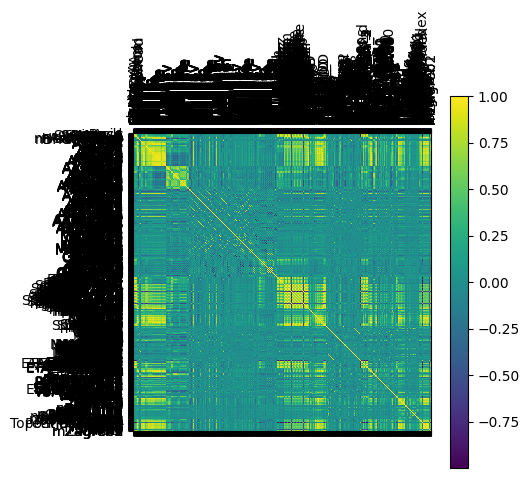

In [27]:
plt.figure(figsize=(30,30))
plt.matshow(corr_mat)
plt.xticks(range(len(corr_mat.columns)),corr_mat.columns,rotation=90)
plt.yticks(range(len(corr_mat.columns)),corr_mat.columns)
plt.colorbar()
plt.show()

**Thanks for these infinite features, now i have to code instead of just dropping them off**

In [28]:
corr_mat = selected_df.corr()

high_corr_threshold = 0.9

corr_cols = set()
for i in range(len(corr_mat.columns)):
    for j in range(i):
        if abs(corr_mat.iloc[i, j]) > high_corr_threshold:
            colname = corr_mat.columns[i]
            corr_cols.add(colname)

df_dropped_high_corr = selected_df.drop(columns=corr_cols)

low_corr_threshold = 0.1

low_corr_cols = corr_mat.columns[(corr_mat.abs() < low_corr_threshold).all()]
df_dropped_low_corr = df_dropped_high_corr.drop(columns=low_corr_cols)

print("DataFrame after dropping highly correlated and low correlated features:")
df_dropped_low_corr.head()


DataFrame after dropping highly correlated and low correlated features:


,cls,nAcid,nBase,SpAbs_A,SpMax_A,VR1_A,nAromAtom,nAtom,nSpiro,nBridgehead,...,TopoPSA(NO),TopoPSA,GGI5,GGI6,GGI7,GGI8,GGI9,SRW05,TSRW10,WPath
0,1,0,0,17.701129,2.439857,61.215418,10,27,0,0,...,43.84,72.08,0.357778,0.248299,0.000000,0.000000,0.000000,3.044522,61.847126,288
1,1,0,0,46.736633,2.407624,2230.324539,23,59,0,0,...,135.78,144.16,1.233056,0.653832,0.413194,0.389810,0.256258,2.397895,85.856674,5352
2,1,0,0,39.586705,2.537049,308.603378,21,52,0,0,...,66.01,66.01,1.653056,1.077098,0.619827,0.401612,0.189691,2.397895,80.145118,2195
3,1,0,0,26.395318,2.442924,185.555867,16,31,0,0,...,75.40,103.64,0.621667,0.301270,0.215313,0.050887,0.013758,3.044522,69.229338,853
4,1,0,0,35.597476,2.464844,319.313188,11,51,0,0,...,67.98,96.22,0.812778,0.461270,0.353387,0.255244,0.171566,3.044522,77.687460,1886


<Figure size 2000x2000 with 0 Axes>

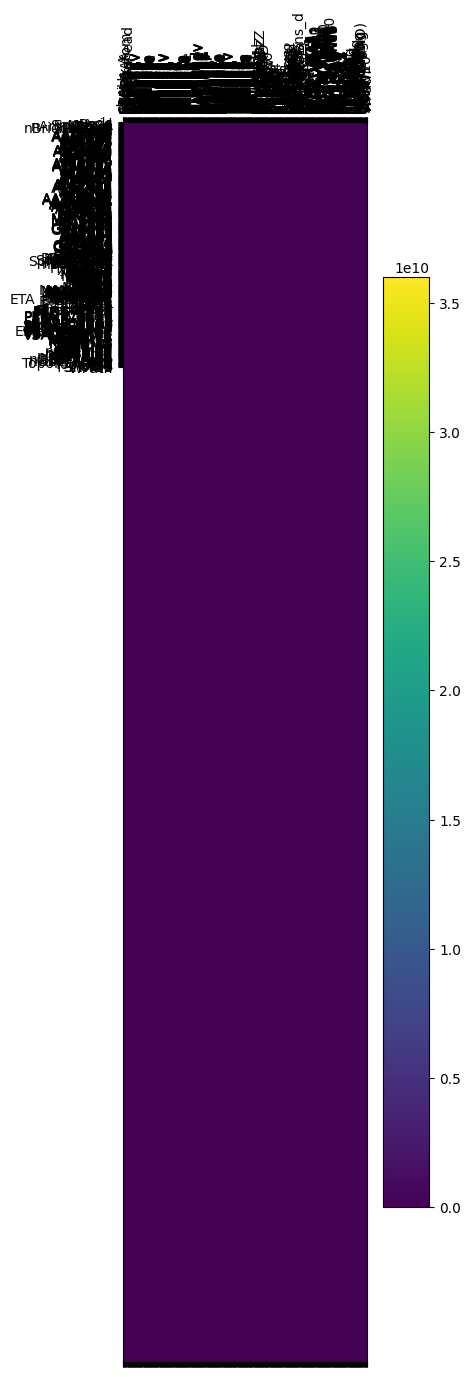

In [29]:
plt.figure(figsize=(20,20))
plt.matshow(df_dropped_low_corr)
plt.xticks(range(len(df_dropped_low_corr.columns)),df_dropped_low_corr.columns,rotation=90)
plt.yticks(range(len(df_dropped_low_corr.columns)),df_dropped_low_corr.columns)
plt.colorbar()
plt.show()

*Yeah even i don't know how to plot a graph with 400 features. sorry sir*

In [30]:

target_feature = 'mZagreb1'

features_for_corr = selected_df.drop(columns=[target_feature])

corr_mat = features_for_corr.corr()

high_corr_threshold = 0.9

corr_cols = set()
for i in range(len(corr_mat.columns)):
    for j in range(i):
        if abs(corr_mat.iloc[i, j]) > high_corr_threshold:
            colname = corr_mat.columns[i]
            corr_cols.add(colname)

df_dropped_high_corr = features_for_corr.drop(columns=corr_cols)

low_corr_threshold = 0.1

low_corr_cols = corr_mat.columns[(corr_mat.abs() < low_corr_threshold).all()]
df_dropped_low_corr = df_dropped_high_corr.drop(columns=low_corr_cols)

print("DataFrame after dropping highly correlated and low correlated features:")
df_dropped_low_corr.head()


DataFrame after dropping highly correlated and low correlated features:


,cls,nAcid,nBase,SpAbs_A,SpMax_A,VR1_A,nAromAtom,nAtom,nSpiro,nBridgehead,...,TopoPSA(NO),TopoPSA,GGI5,GGI6,GGI7,GGI8,GGI9,SRW05,TSRW10,WPath
0,1,0,0,17.701129,2.439857,61.215418,10,27,0,0,...,43.84,72.08,0.357778,0.248299,0.000000,0.000000,0.000000,3.044522,61.847126,288
1,1,0,0,46.736633,2.407624,2230.324539,23,59,0,0,...,135.78,144.16,1.233056,0.653832,0.413194,0.389810,0.256258,2.397895,85.856674,5352
2,1,0,0,39.586705,2.537049,308.603378,21,52,0,0,...,66.01,66.01,1.653056,1.077098,0.619827,0.401612,0.189691,2.397895,80.145118,2195
3,1,0,0,26.395318,2.442924,185.555867,16,31,0,0,...,75.40,103.64,0.621667,0.301270,0.215313,0.050887,0.013758,3.044522,69.229338,853
4,1,0,0,35.597476,2.464844,319.313188,11,51,0,0,...,67.98,96.22,0.812778,0.461270,0.353387,0.255244,0.171566,3.044522,77.687460,1886


**brought down number of features to 474** 